In [27]:
import os
import sys

from typing import List, Tuple

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from infovar import ContinuousHandler
from infovar.stats.info_theory import corr_to_info

sys.path.insert(0, os.path.join(".."))

from orion_util import latex_line, latex_param

plt.rc("text", usetex=True)
dirname = "continuous_images"

## Settings

In [28]:
lims = {
    'av': [1e+0, 8e+1],
    'g0': [None, None]
}

In [29]:
params_target = ["av", "g0"]            # Can be "av", "g0" or ["av", "g0"]
params_regime = ["av", "g0"]    # Cannot be modified
lines_list = ["12co10", "12cs21", "13co10", "c18o10", "hcn10", "hcop10", "hnc10", "n2hp10"]

## Helpers

In [30]:
def display_comb_params(c: Tuple[str]) -> str:
    if len(c) == 1:
        return f"${latex_param(c[0])}$"
    return "$(" + ",".join([latex_param(p) for p in c]) + ")$"

def display_comb_lines(c: Tuple[str], short: bool=False) -> str:
    if len(c) == 1:
        return f"${latex_line(c[0], short=short)}$"
    return "$(" + ",".join([latex_line(l, short=short) for l in c]) + ")$"

## Data loading

In [31]:
save_path = os.path.join("..", "data", "continuous")
ref_path = ""

handler = ContinuousHandler(
    ref_path=ref_path,
    save_path=save_path
)

## Formatting

In [32]:
if isinstance(params_target, str):
    params_target = [params_target]
assert isinstance(params_target, List)

if isinstance(lines_list, str):
    lines = [lines_list]
assert isinstance(lines_list, List)

for i, l in enumerate(lines_list):
    if isinstance(l, str):
        lines_list[i] = [l]
    assert isinstance(lines_list[i], List)

## Number of samples

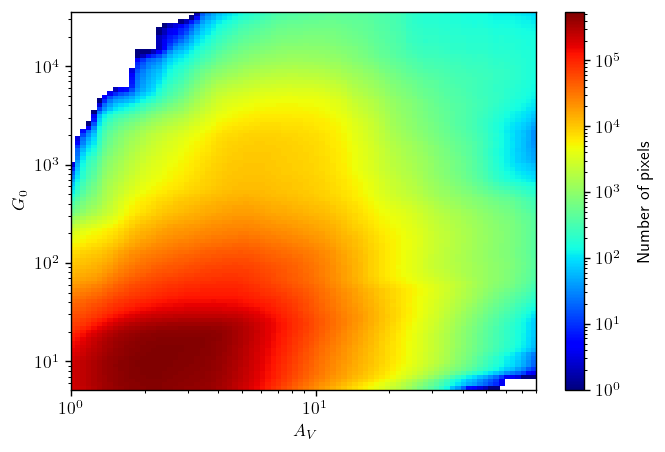

In [33]:
plt.figure(dpi=125)

d = handler.read(
    params_target, lines_list[0], params_regime
)

xticks, yticks = d[f'mi-coords']
mat = d['samples'].T

X, Y = np.meshgrid(xticks, yticks)

np.seterr(divide='ignore')
plt.pcolor(X, Y, mat, cmap="jet", norm=LogNorm(1, None))
cbar = plt.colorbar()
cbar.set_label("Number of pixels", labelpad=10)

plt.xscale('log')
plt.yscale('log')
plt.xlim(lims[params_regime[0]])
plt.ylim(lims[params_regime[1]])

plt.xlabel(f"${latex_param(params_regime[0])}$")
plt.ylabel(f"${latex_param(params_regime[1])}$")

filename = "pixels.png"
plt.savefig(os.path.join(dirname, filename))
plt.show()

## Images

In [34]:
cmap = "jet"
cmap_diff = "magma"

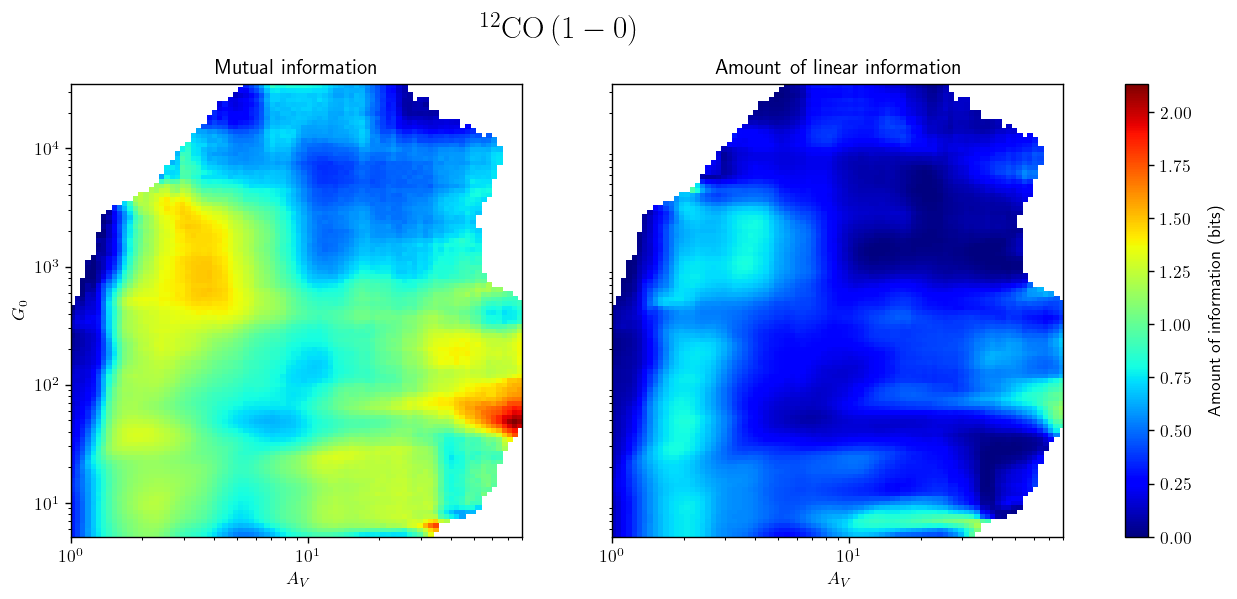

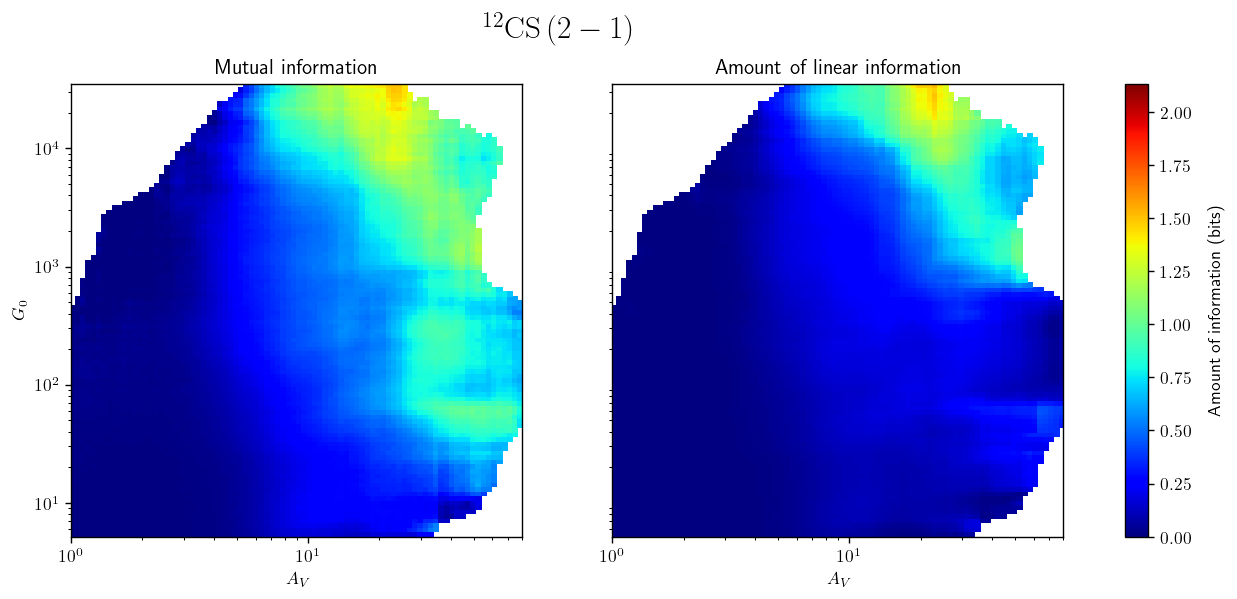

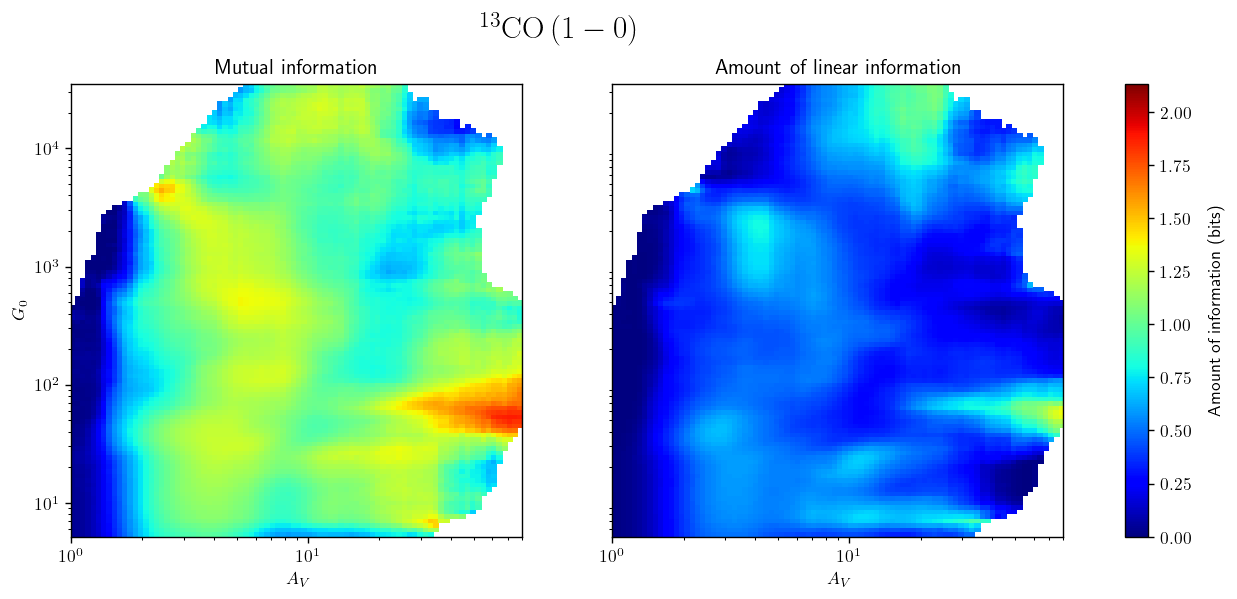

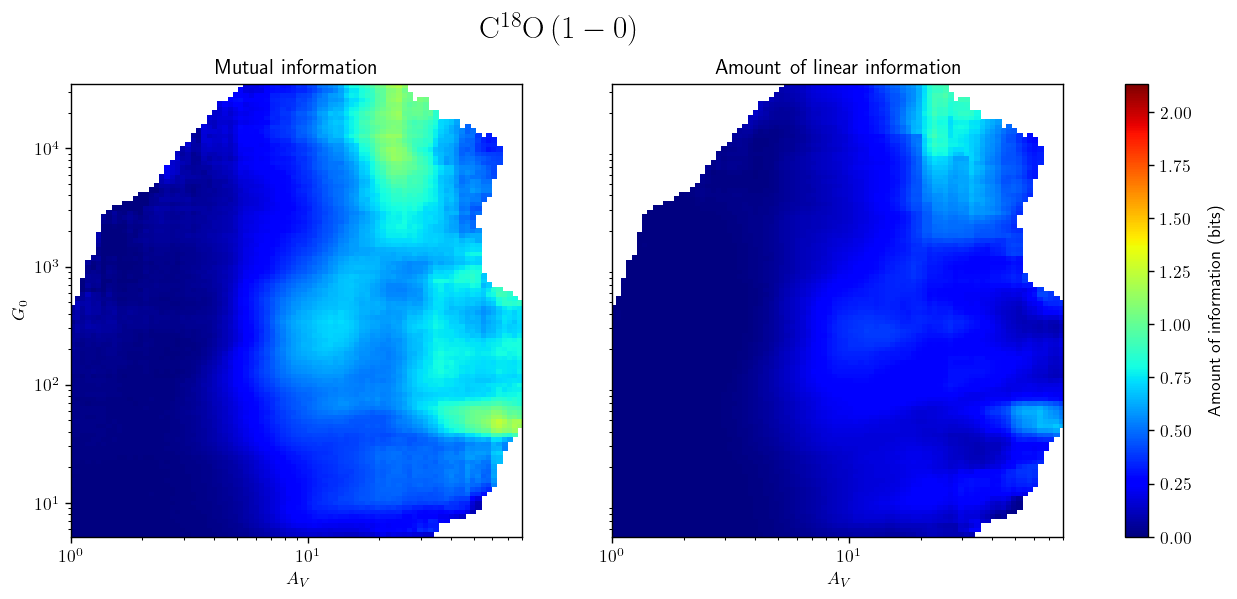

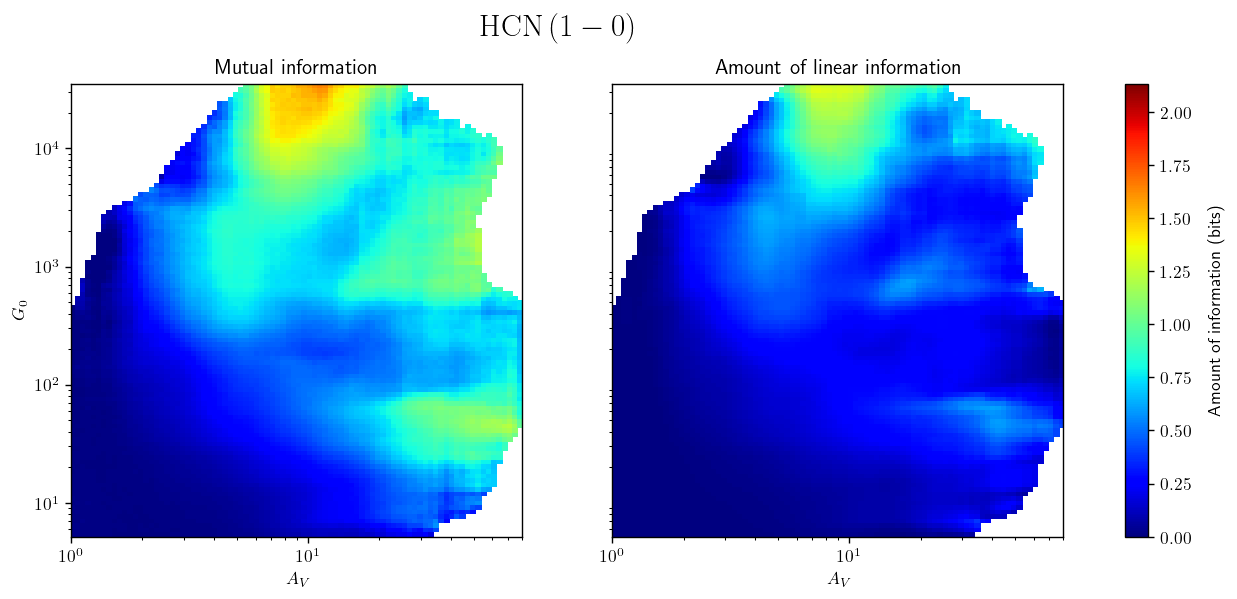

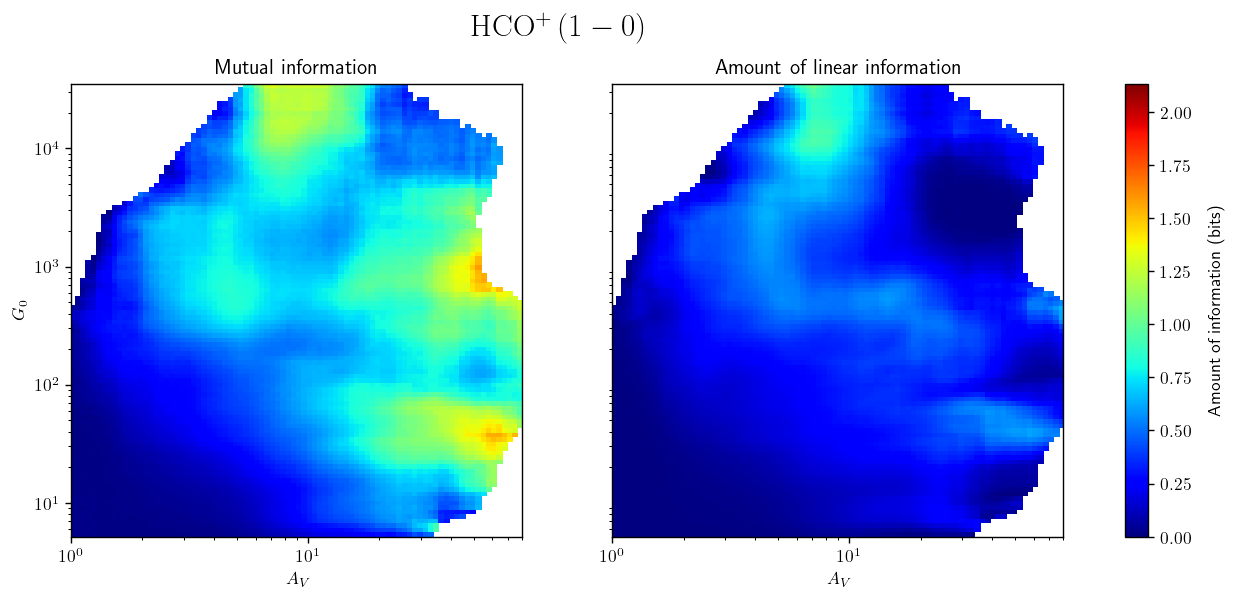

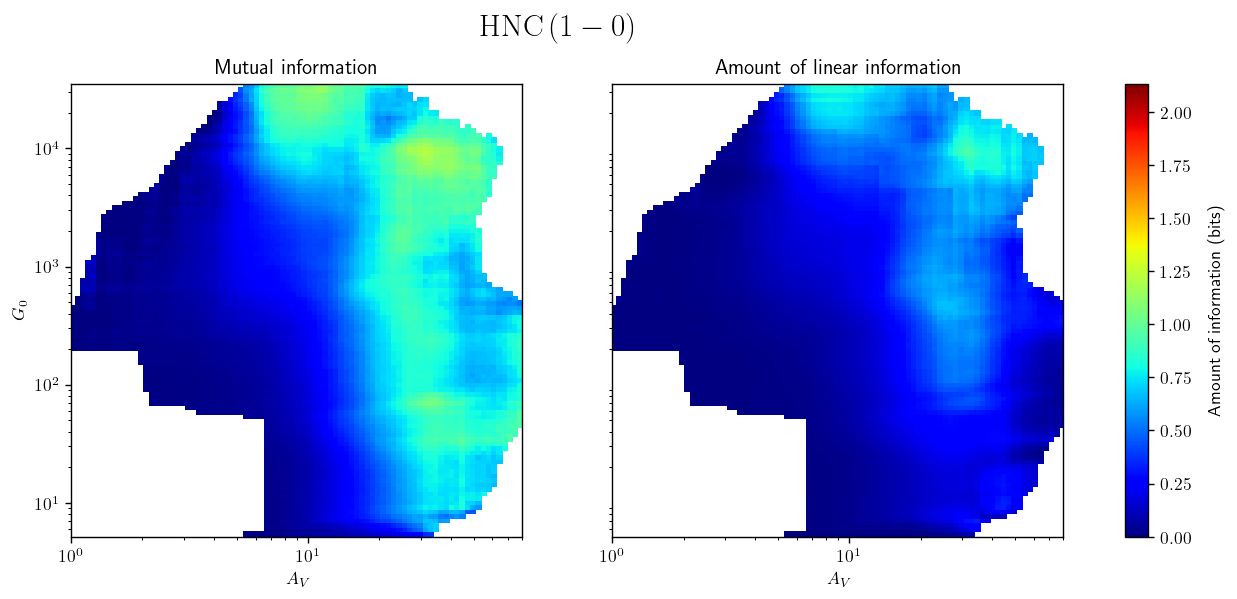

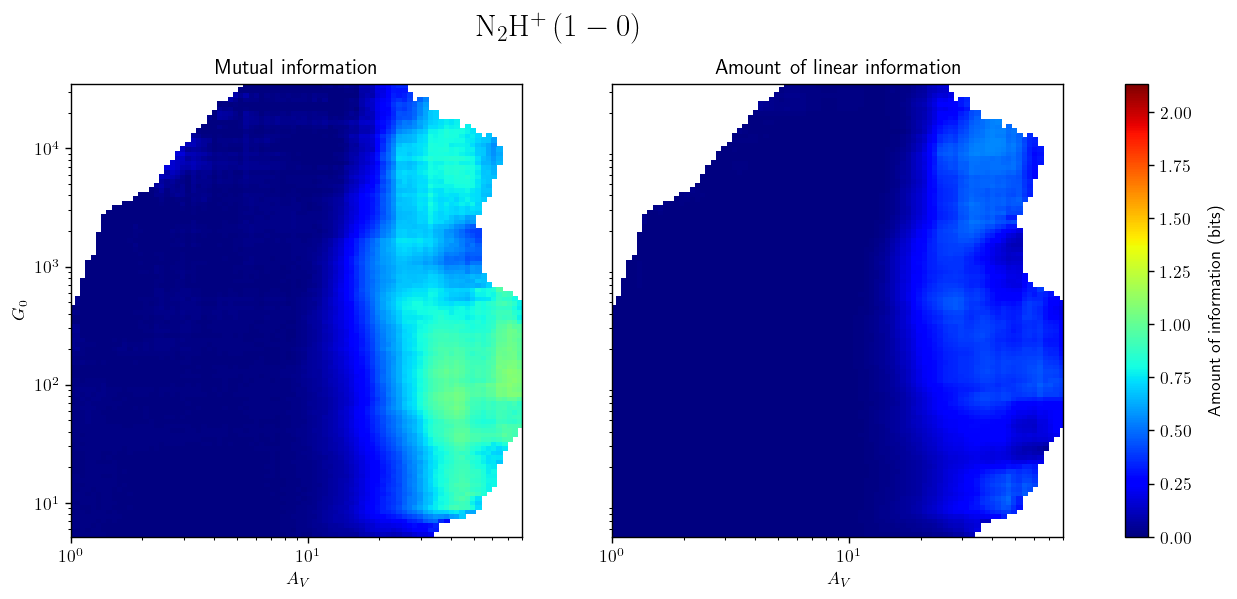

In [35]:
vmin = 0
vmax = 0
for lines in lines_list:

    d = handler.read(
        params_target, lines, params_regime
    )

    vmax = max(vmax, np.nanmax(d[f'mi-data']))
    vmax = max(vmax, np.nanmax(corr_to_info(d[f'corr-data'])))

for lines in lines_list:

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2*6.4, 4.8), dpi=125)

    d = handler.read(
        params_target, lines, params_regime
    )

    xticks, yticks = d[f'mi-coords']
    mat_mi = d['mi-data'].T
    mat_corr = corr_to_info(d['corr-data']).T

    X, Y = np.meshgrid(xticks, yticks)

    ax1.pcolor(X, Y, mat_mi, cmap=cmap, vmin=vmin, vmax=vmax)
    im = ax2.pcolor(X, Y, mat_corr, cmap=cmap, vmin=vmin, vmax=vmax)

    cbar = fig.colorbar(im, ax=[ax1, ax2])
    cbar.set_label("Amount of information (bits)", labelpad=10)

    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax2.set_xscale('log')
    ax2.set_yscale('log')

    ax1.set_xlim(lims[params_regime[0]])
    ax1.set_ylim(lims[params_regime[1]])
    ax2.set_xlim(lims[params_regime[0]])
    ax2.set_ylim(lims[params_regime[1]])

    ax1.set_xlabel(f"${latex_param(params_regime[0])}$")
    ax1.set_ylabel(f"${latex_param(params_regime[1])}$")
    ax2.set_xlabel(f"${latex_param(params_regime[0])}$")
    ax2.set_yticks([])

    title = display_comb_lines(lines)

    ax1.set_title("Mutual information")
    ax2.set_title("Amount of linear information")
    fig.suptitle(title, fontsize=18, x=0.43, y=1.0)

    filename = f"{'_'.join(params_target)}__{'_'.join(lines)}.png"
    plt.savefig(os.path.join(dirname, filename))
    plt.show()

## Differences

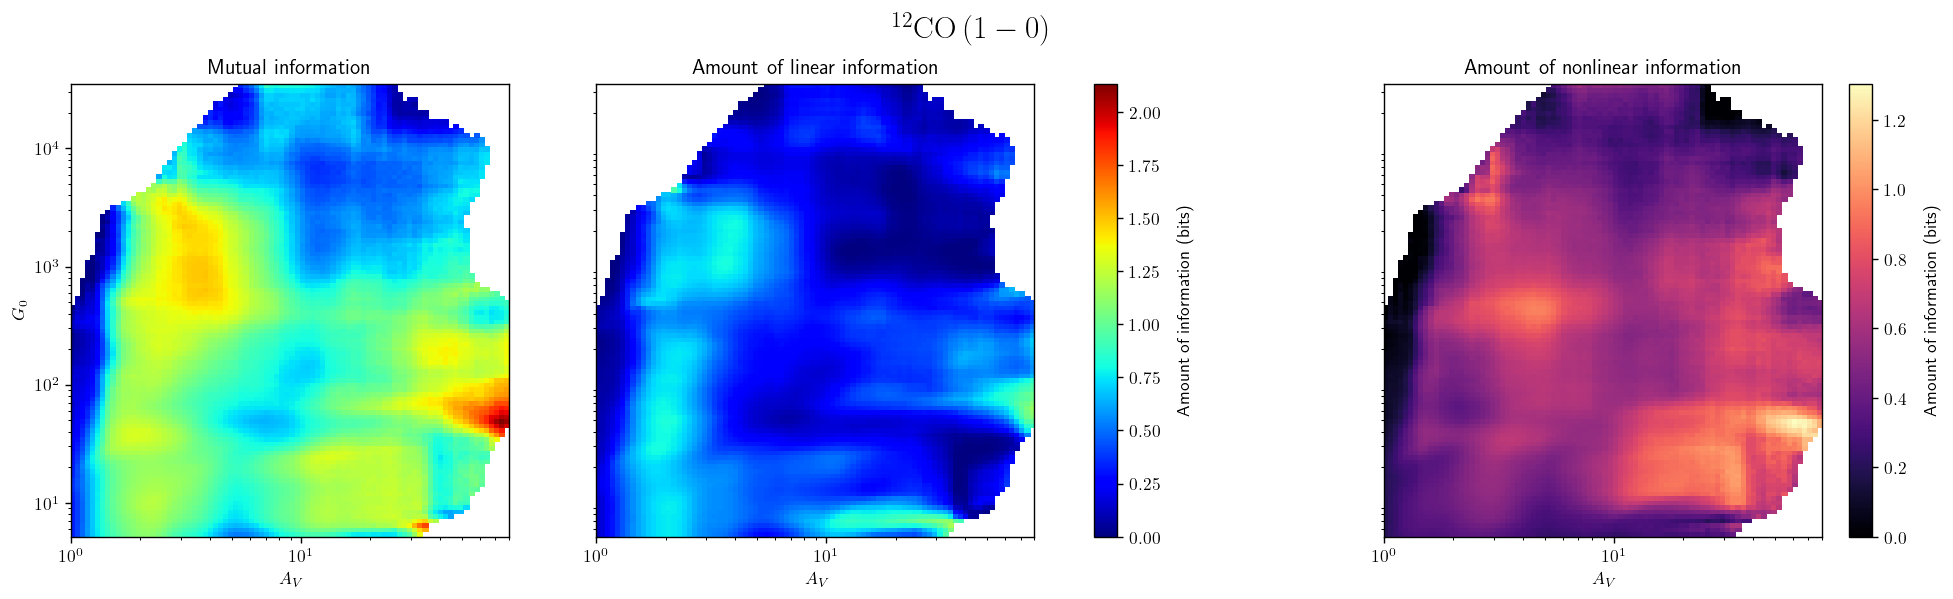

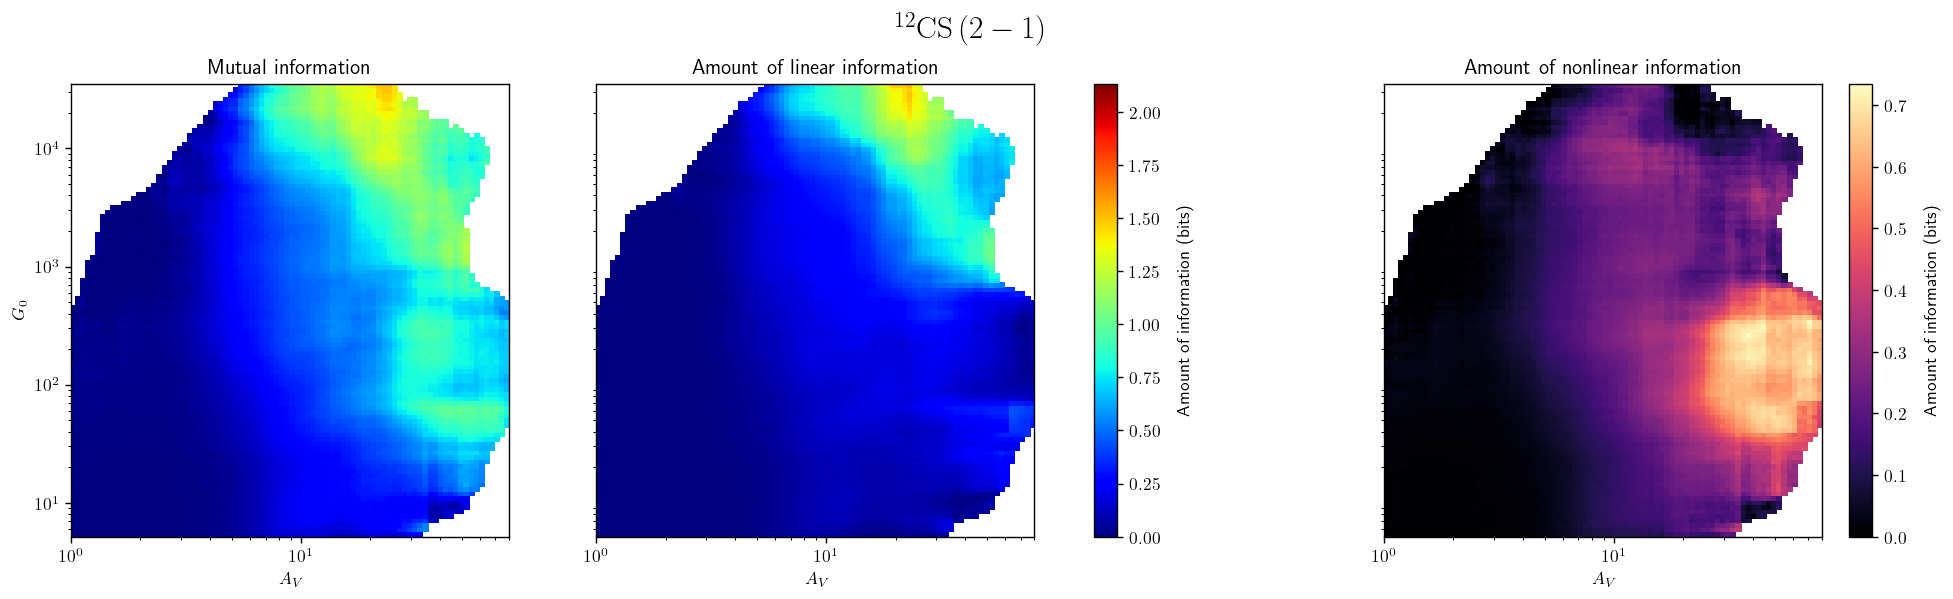

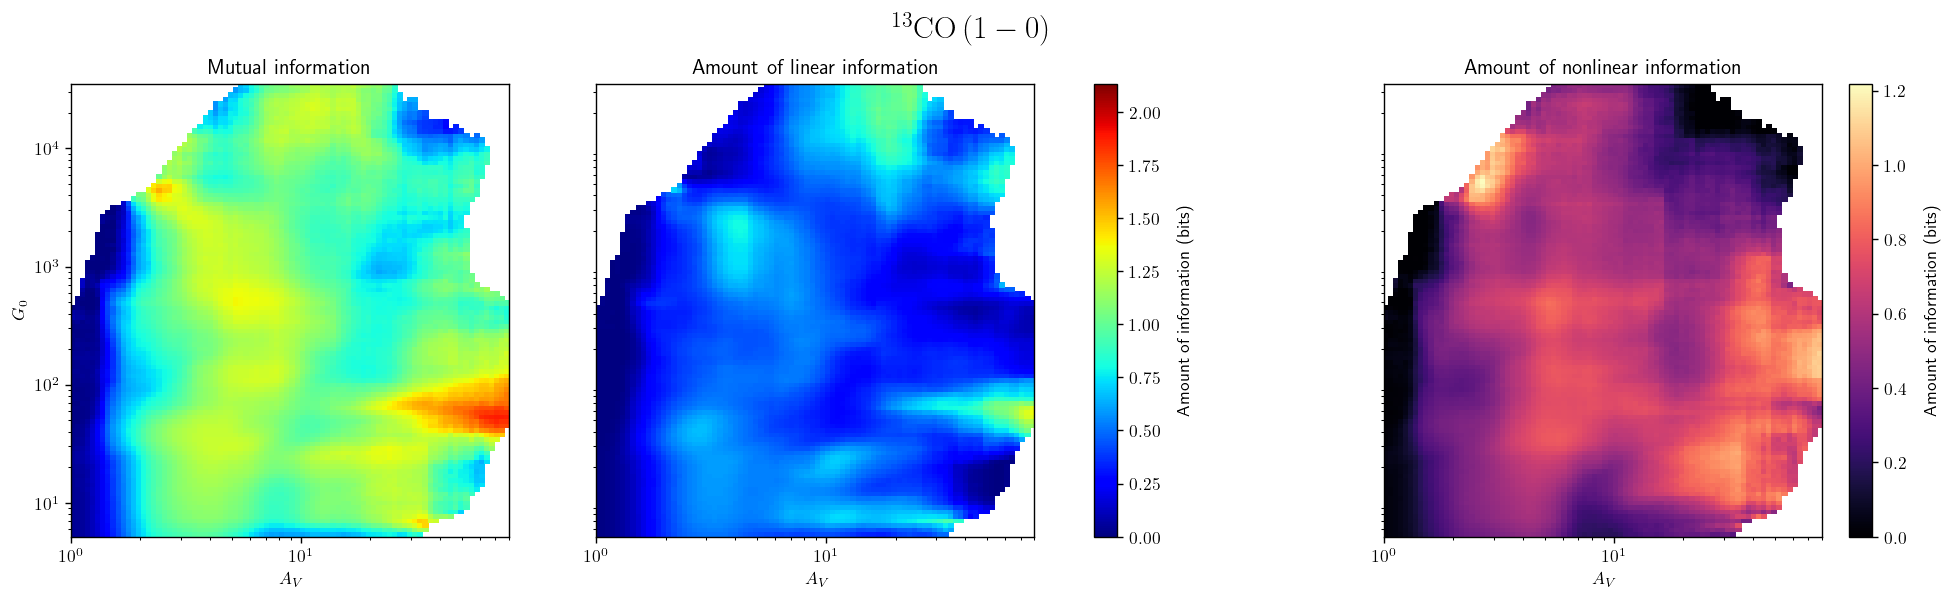

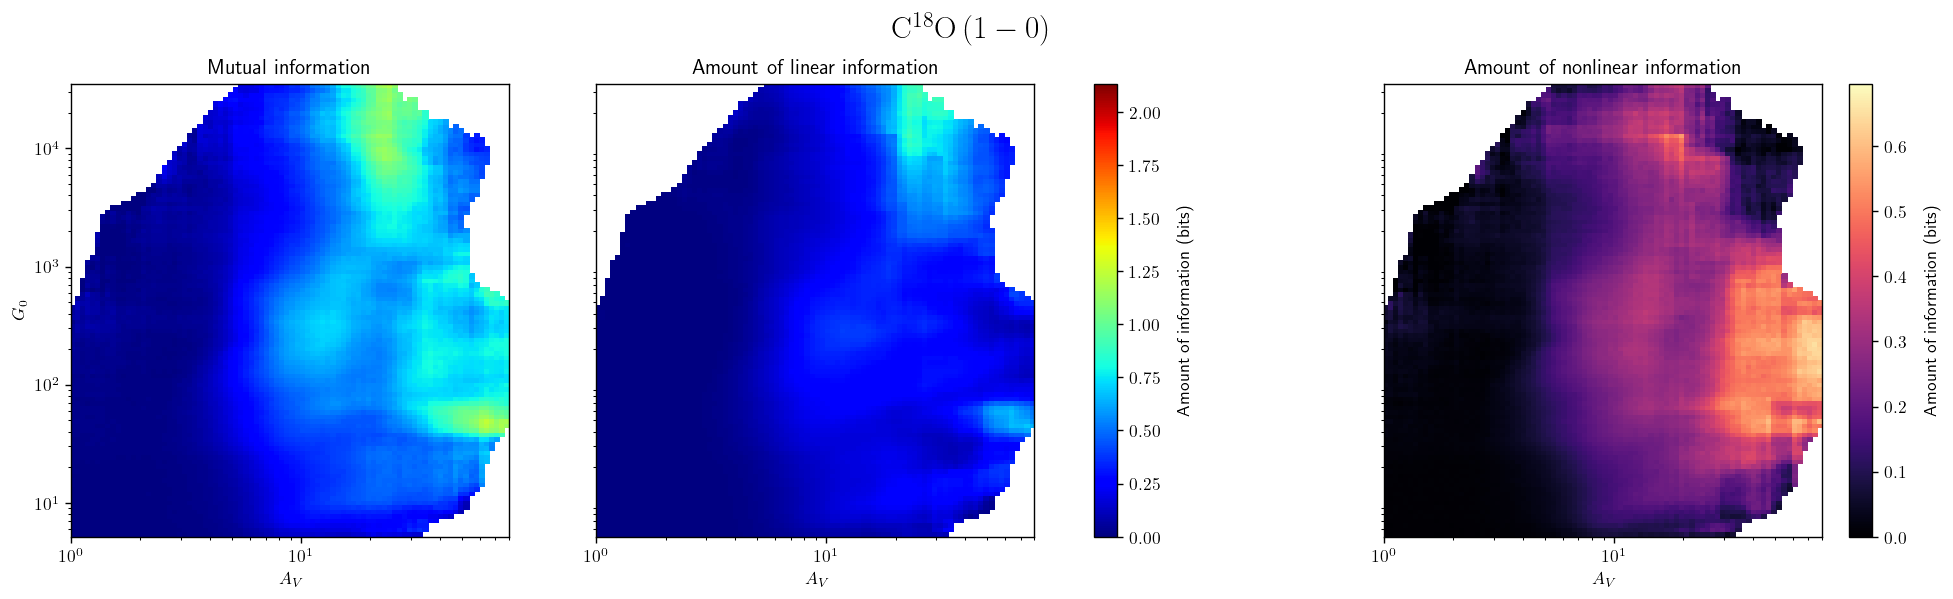

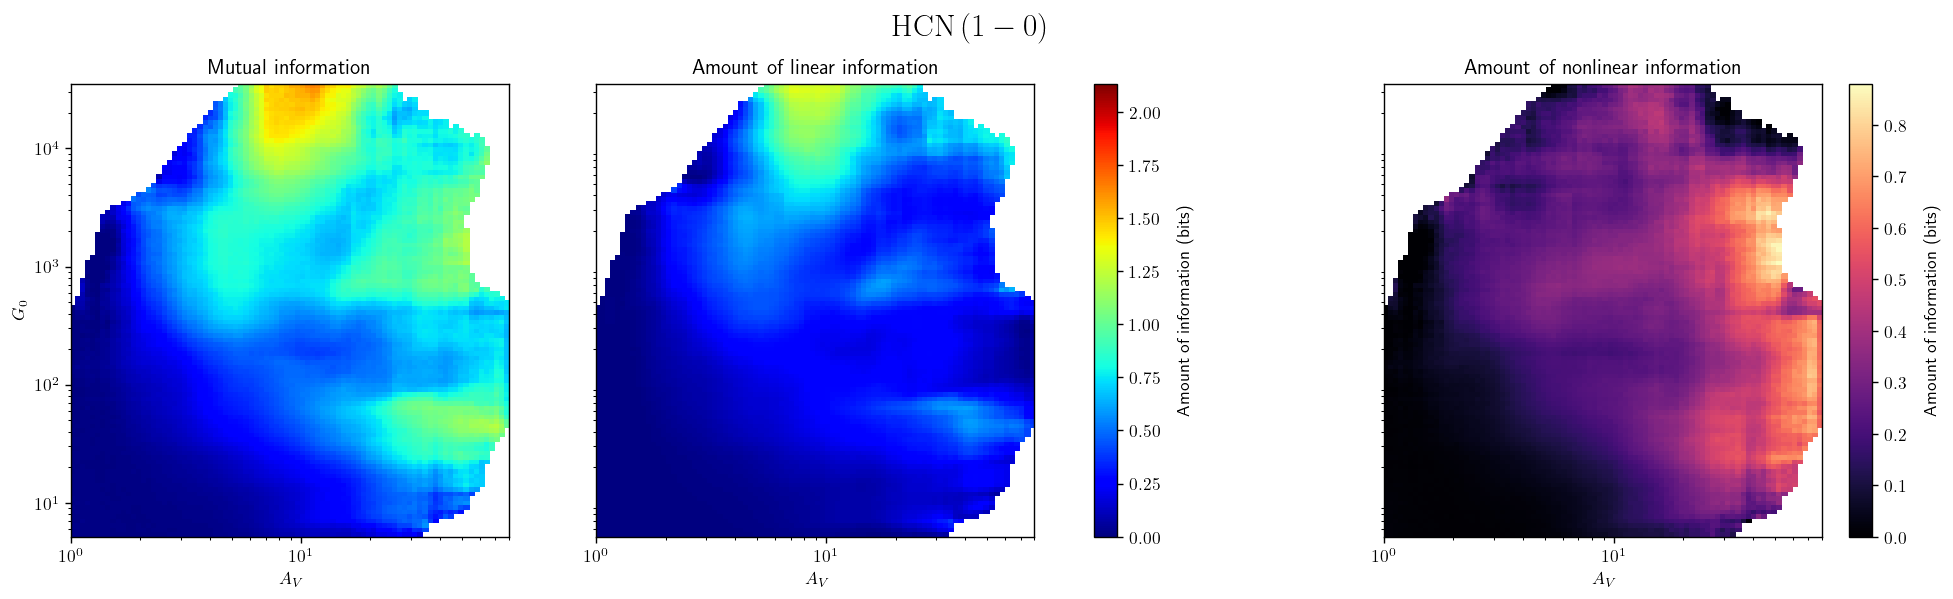

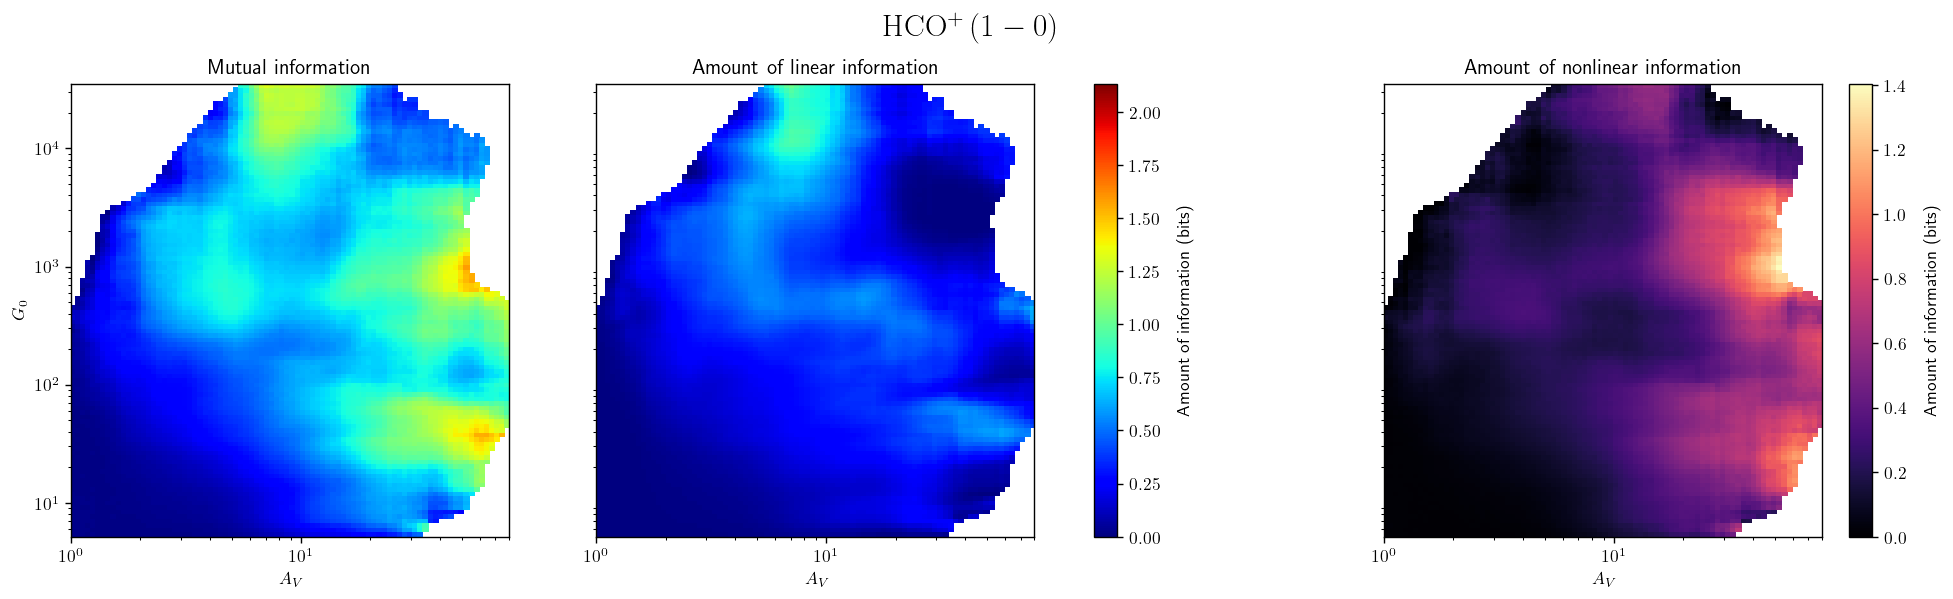

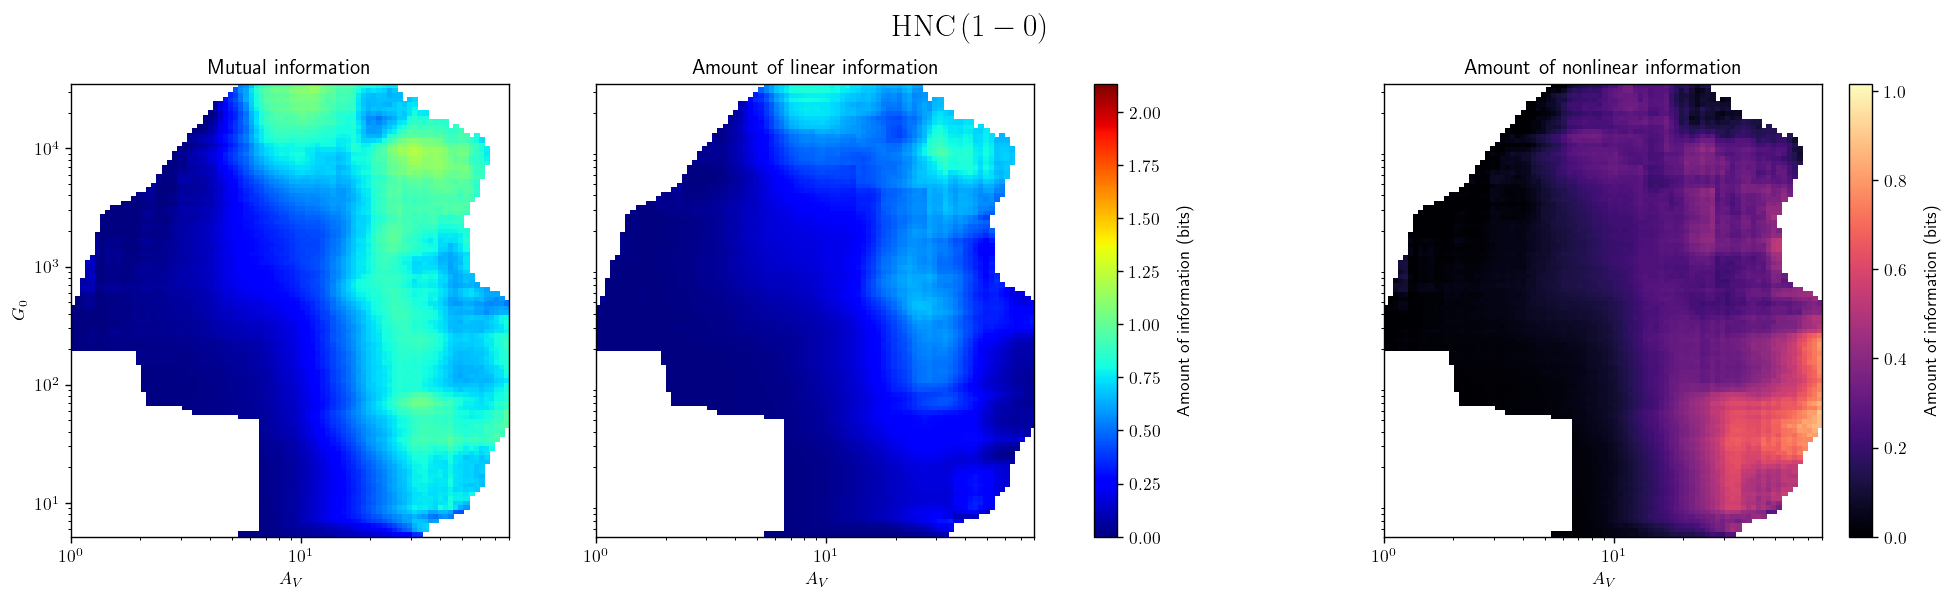

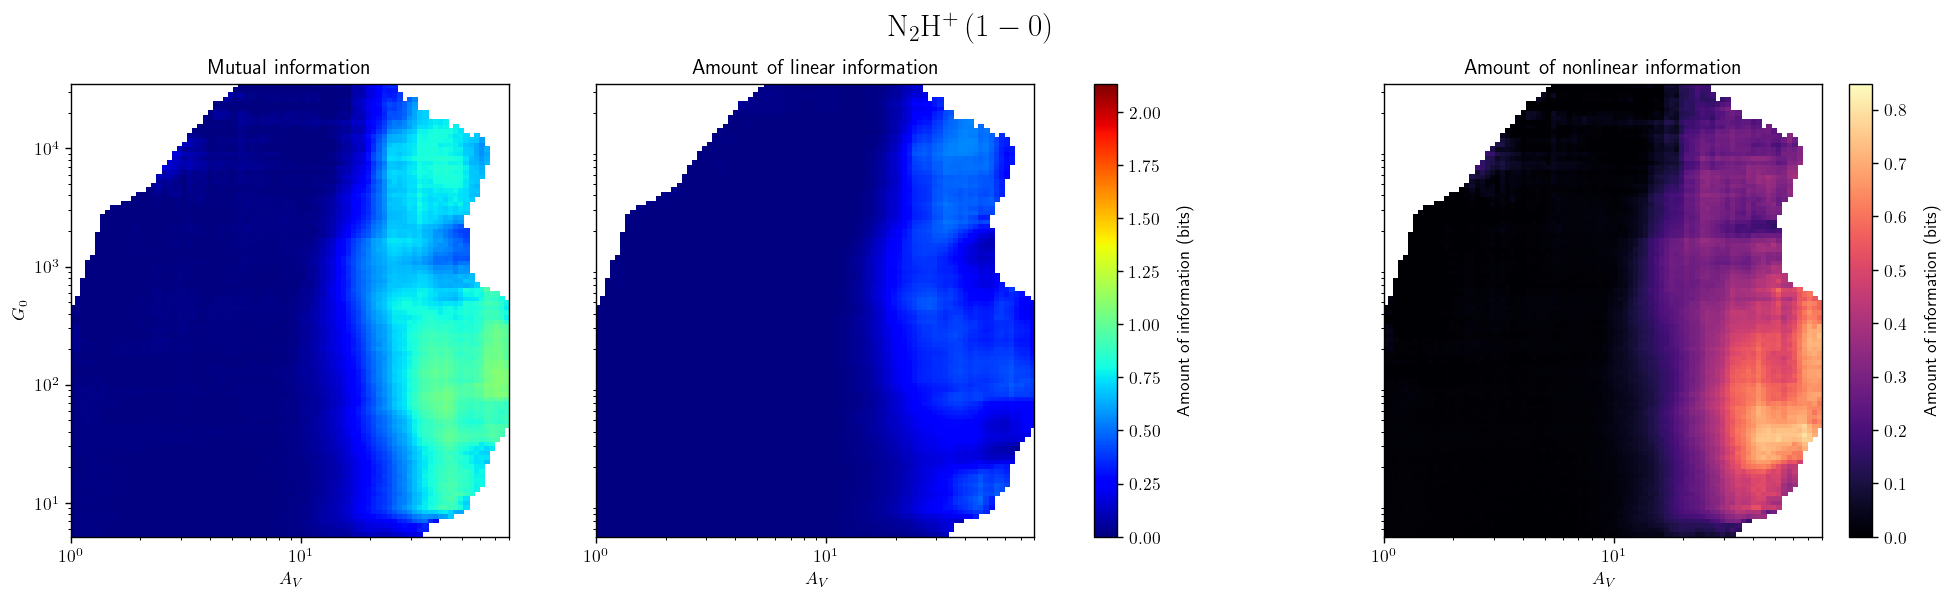

In [36]:
vmin = 0
vmax = 0
for lines in lines_list:

    d = handler.read(
        params_target, lines, params_regime
    )

    vmax = max(vmax, np.nanmax(d[f'mi-data']))
    vmax = max(vmax, np.nanmax(corr_to_info(d[f'corr-data'])))

for lines in lines_list:

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(3*6.4, 4.8), dpi=125)

    d = handler.read(
        params_target, lines, params_regime
    )

    xticks, yticks = d[f'mi-coords']
    mat_mi = d['mi-data'].T
    mat_corr = corr_to_info(d['corr-data']).T
    mat_diff = mat_mi - mat_corr

    X, Y = np.meshgrid(xticks, yticks)

    ax1.pcolor(X, Y, mat_mi, cmap=cmap, vmin=vmin, vmax=vmax)
    im = ax2.pcolor(X, Y, mat_corr, cmap=cmap, vmin=vmin, vmax=vmax)

    cbar = fig.colorbar(im, ax=[ax1, ax2])
    cbar.set_label("Amount of information (bits)", labelpad=10)

    im = ax3.pcolor(X, Y, mat_diff, cmap=cmap_diff, vmin=0)

    cbar = fig.colorbar(im, ax=[ax3])
    cbar.set_label("Amount of information (bits)", labelpad=10)

    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    ax3.set_xscale('log')
    ax3.set_yscale('log')

    ax1.set_xlim(lims[params_regime[0]])
    ax1.set_ylim(lims[params_regime[1]])
    ax2.set_xlim(lims[params_regime[0]])
    ax2.set_ylim(lims[params_regime[1]])
    ax3.set_xlim(lims[params_regime[0]])
    ax3.set_ylim(lims[params_regime[1]])

    ax1.set_xlabel(f"${latex_param(params_regime[0])}$")
    ax1.set_ylabel(f"${latex_param(params_regime[1])}$")
    ax2.set_xlabel(f"${latex_param(params_regime[0])}$")
    ax2.set_yticks([])
    ax3.set_xlabel(f"${latex_param(params_regime[0])}$")
    ax3.set_yticks([])

    if len(lines) == 1:
        title = f"${latex_line(lines[0])}$"
    else:
        title = "$(" + ",".join([latex_line(l) for l in lines]) + ")$"

    ax1.set_title("Mutual information")
    ax2.set_title("Amount of linear information")
    ax3.set_title("Amount of nonlinear information")
    fig.suptitle(title, fontsize=18, x=0.5, y=1.0)
    
    filename = f"{'_'.join(params_target)}__{'_'.join(lines)}__diff.png"
    plt.savefig(os.path.join(dirname, filename))
    plt.show()

In [37]:
mat_mis = []
mat_corrs = []

for lines in lines_list:

    d = handler.read(
        params_target, lines, params_regime
    )

    xticks, yticks = d[f'mi-coords']
    mat_mi = d['mi-data'].T
    mat_corr = corr_to_info(d['corr-data']).T

    X, Y = np.meshgrid(xticks, yticks)

    mat_mis.append(mat_mi[..., np.newaxis])
    mat_corrs.append(mat_corr[..., np.newaxis])

mat_mis = np.concatenate([np.zeros_like(mat_mis[0])] + mat_mis, axis=-1)
mat_corrs = np.concatenate([np.zeros_like(mat_corrs[0])] + mat_corrs, axis=-1)

In [38]:
res_mi = np.nanargmax(mat_mis, axis=-1)
res_corr = np.nanargmax(mat_corrs, axis=-1)

res_mi = np.where(res_mi == 0, np.nan, res_mi)
res_corr = np.where(res_corr == 0, np.nan, res_corr)

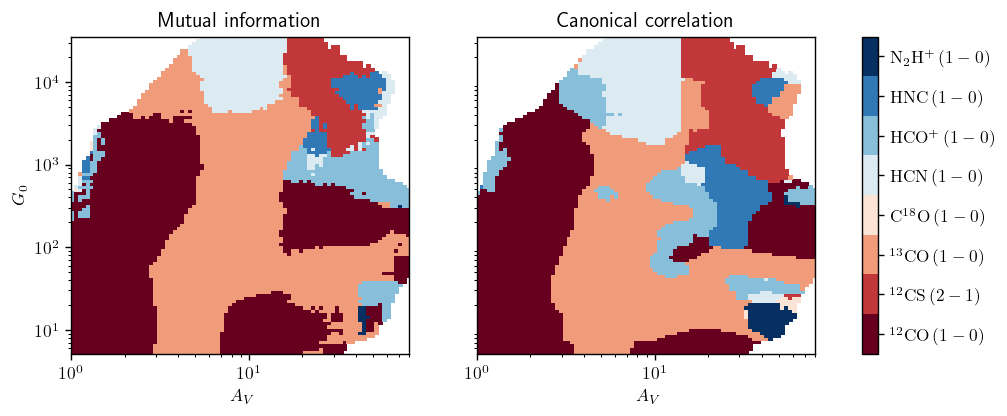

In [39]:
from matplotlib import cm

n = len(lines_list)
cmap = cm.get_cmap('RdBu', n)

plt.figure(figsize=(1.5*6.4, 0.7*4.8), dpi=125)

#

plt.subplot(1, 2, 1)
ax1 = plt.gca()

plt.pcolor(X, Y, res_mi, cmap=cmap, vmin=0.5, vmax=n+0.5)

plt.xscale('log')
plt.yscale('log')

plt.xlim(lims[params_regime[0]])
plt.ylim(lims[params_regime[1]])

plt.xlabel(f"${latex_param(params_regime[0])}$")
plt.ylabel(f"${latex_param(params_regime[1])}$")
plt.title("Mutual information")

#

plt.subplot(1, 2, 2)
ax2 = plt.gca()

plt.pcolor(X, Y, res_corr, cmap=cmap, vmin=0.5, vmax=n+0.5)

cbar = plt.colorbar(ax=[ax1, ax2])
cbar.set_ticks(np.arange(n)+1, labels=[display_comb_lines(c) for c in lines_list])

plt.xscale('log')
plt.yscale('log')

plt.xlim(lims[params_regime[0]])
plt.ylim(lims[params_regime[1]])

plt.xlabel(f"${latex_param(params_regime[0])}$")
plt.yticks([])
plt.title("Canonical correlation")

filename = f"{'_'.join(params_target)}__summary.png"
plt.savefig(os.path.join(dirname, filename))
plt.show()